In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from sympy import * 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('../../')
from functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [2]:
path = '../../../../KU/Bachelor+Research/Data/Piccaro/'

df = read_data(path)

c:\Users\nan25\OneDrive\Dokumenter\GitHub\Metal-chlorides\Bachelor\Piccaro\functions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['seconds'] = new_df['seconds'] - new_df['seconds'][0]


In [3]:
for i, time in enumerate(df['TIME']):
    if '12:10:02' in time:
        print(i, time, 'exp1')
    if '12:55:03' in time:
        print(i, time, 'exp1')
    if '13:05:03' in time:
        print(i, time, 'exp1 light on')
    if '13:15:05' in time:
        print(i, time, 'exp1')
    if '13:25:03' in time:
        print(i, time, 'exp1 light off')
    if '13:30:04' in time:
        print(i, time, 'exp1')
    if '13:35:04' in time:
        print(i, time, 'exp1')

1041 12:10:02 exp1
2853 12:55:03.499 exp1
3024 13:05:03.259 exp1 light on
3196 13:15:05.197 exp1
3367 13:25:03.572 exp1 light off
3453 13:30:04.088 exp1
3539 13:35:04.859 exp1


In [4]:
for i, time in enumerate(df['TIME']):
    if '16:13:02' in time:
        print(i, time, 'exp2')
    if '16:23:02' in time:
        print(i, time, 'exp2 light on')
    if '16:30:03' in time:
        print(i, time, 'exp2')
    if '16:40:03' in time:
        print(i, time, 'exp2 light off')
    if '16:45:03' in time:
        print(i, time, 'exp2')
    if '16:50:03' in time:
        print(i, time, 'exp2')

6290 16:13:02.959 exp2
6464 16:23:02.657 exp2 light on
6586 16:30:03.494 exp2
6760 16:40:03.311 exp2 light off
6847 16:45:03.493 exp2
6934 16:50:03.427 exp2


In [5]:
idx_array = np.array([[2853, 3034], [3196, 3367], [3453, 3539], [6290, 6464], [6586, 6760], [6847, 6934]])
exp_keys = ['exp1 leak1', 'exp1 light', 'exp1 leak2', 'exp2 leak1', 'exp2 light', 'exp2 leak2']

pd.options.mode.chained_assignment = None 
treat_dict = dict_for_treatment(df, idx_array, exp_keys)
for key in exp_keys[:3]:
    treat_dict[key]['seconds'] = treat_dict[key]['seconds'] - df['seconds'][2853]
for key in exp_keys[3:]:
    treat_dict[key]['seconds'] = treat_dict[key]['seconds'] - df['seconds'][6290]

In [6]:
a_guess = np.zeros(6) - 0.0005
b_guess = np.zeros(6) + 100

a, b, ea, eb, Chi2, ndf, prob = fit_exp(treat_dict, a_guess, b_guess)

exp1 leak1  Fit: a=-0.000008+-0.00002054  b=80.881+-0.607  p=1.000000
exp1 light  Fit: a=-0.000010+-0.00002243  b=81.203+-2.748  p=1.000000
exp1 leak2  Fit: a=-0.000015+-0.00006317  b=81.865+-11.640  p=1.000000
exp2 leak1  Fit: a=-0.000008+-0.00002225  b=62.353+-0.479  p=1.000000
exp2 light  Fit: a=-0.000006+-0.00002224  b=62.508+-1.850  p=1.000000
exp2 leak2  Fit: a=-0.000011+-0.00006314  b=62.921+-8.228  p=1.000000


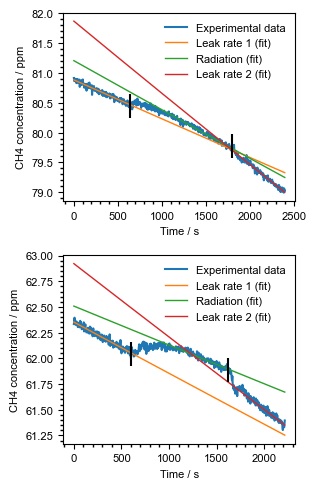

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (3.2, 5))

plot_full_exp(ax[0], df, a[:3], b[:3], [2853, 3539], [3034, 3367])
plot_full_exp(ax[1], df, a[3:], b[3:], [6290, 6934], [6465, 6760])

fig.tight_layout()
fig.savefig('Full_exp.jpg', dpi = 600)
plt.show()

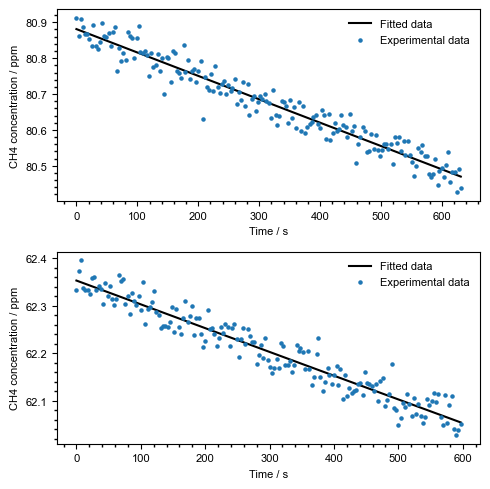

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (5, 5))

plot_before_lamp(ax[0], treat_dict, a[0], b[0], 'exp1 leak1')
plot_before_lamp(ax[1], treat_dict, a[3], b[3], 'exp2 leak1')

fig.tight_layout()
fig.savefig('leak1.jpg', dpi = 600)
plt.show()

before radiation:  79.42403128854367 +- 3.7175482562844606
after radiation:  79.17474991895942 +- 15.914506319986735
before radiation:  61.325278354385006 +- 2.862004739355379
after radiation:  61.45388698116443 +- 11.359897936902058


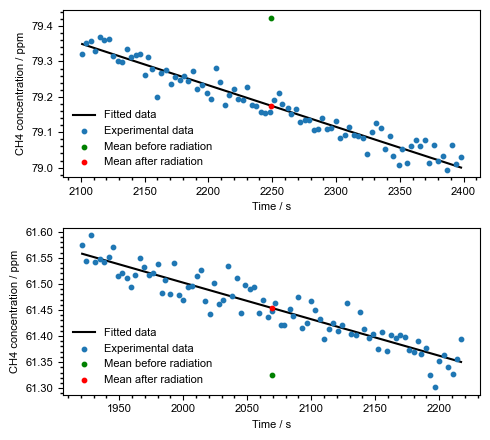

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (5, 4.5))

exp1_y1, exp1_ey1, exp1_y2, exp1_ey2 = plot_mean_conc(ax[0], treat_dict['exp1 leak2'], 3, [a[0], a[2]], [b[0], b[2]], [ea[0], ea[2]], [eb[0], eb[2]])
exp2_y1, exp2_ey1, exp2_y2, exp2_ey2 = plot_mean_conc(ax[1], treat_dict['exp2 leak2'], 3, [a[3], a[5]], [b[3], b[5]], [ea[3], ea[5]], [eb[3], eb[5]])

fig.tight_layout()
fig.savefig('leak2.jpg', dpi = 600)
plt.show()